In [12]:
from ProcessImage import ProcessImages
from ProcessImage import ProcessImage

In [13]:
import numpy as np

In [14]:
import matplotlib as plt
from PIL import Image

In [15]:
import os

In [16]:
import matplotlib.pyplot as plt

###  First let's look at a few images to get an idea of what we're dealing with with these steps:
   <ul>
        <li> Retrieve images from train and masks  directories</li>
        <li> Apply the Process Image library to get Images </li>
        <li> Visualize the Images </li>
   </ul>
    

In [17]:
image_paths = r"images/"
mask_paths = r"masks/"

In [18]:
salt_path = os.path.join(image_paths,os.listdir(image_paths)[1])
mask_path = os.path.join(mask_paths, os.listdir(mask_paths)[1])

In [19]:
salt_processing = ProcessImage(salt_path).pixelize_values(128,128)
mask_processing = ProcessImage(mask_path).pixelize_values(128,128)

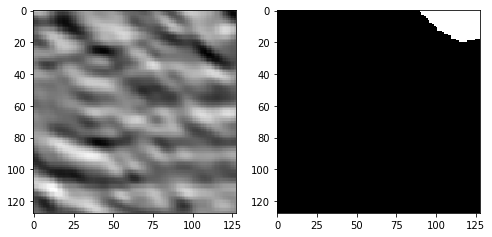

In [20]:
plot1 = np.reshape(salt_processing.flatten(), (128,128)).T
plot2 = np.reshape(mask_processing.flatten(), (128,128)).T
fig=plt.figure(figsize=(8, 8))
fig.add_subplot(1,2,1)
plt.imshow(plot1, cmap="gray")
fig.add_subplot(1,2,2)
plt.imshow(plot2, cmap="gray")
plt.show()

# <u>Combining Matrices to one numpy matrix:</u>

In [21]:
plot1

array([[189, 193, 193, ...,  14,  14,  25],
       [160, 168, 168, ...,   7,   7,   7],
       [160, 168, 168, ...,   7,   7,   7],
       ...,
       [ 99,  97,  97, ..., 151, 151, 145],
       [ 99,  97,  97, ..., 151, 151, 145],
       [101, 102, 102, ..., 137, 137, 134]])

In [22]:
plot2

array([[  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]])

In [23]:
plot3 = np.array((plot1, plot2))
plot3.shape

(2, 128, 128)

### <u>Conclusion</u> : A (num_samples, 2, 101, 101) matrix 
<ul>
    <li> (num_samples, 1, 101, 101) is actual image </li>
    <li> (num_samples, 2, 101, 101) is mask image </li>
</ul>

# <u>Looping Over n-samples (n-samples, 2, 101, 101):</u>
<ul>
    <li> Get an image path and mask path for each sample </li>
    <li> Apply the ProcessImages library </li>
    <li> Flatten and reshape arrays to fit data </li>
    <li> Combine each samples mask and real image </li>

In [24]:
def create_data(paths):
    image_matrices = []
    for file in os.listdir(paths):
        file_path = os.path.join(paths, file)
        pi = ProcessImage(file_path).pixelize_values(128, 128)
        image_reshape = np.reshape(pi.flatten(), (128,128)).T
        image_matrices.append(image_reshape)
    return np.asarray(image_matrices)

In [25]:
salt_multi_data = create_data(image_paths)

In [26]:
mask_multi_data = create_data(mask_paths)

In [27]:
salt_multi_data.shape

(4000, 128, 128)

In [28]:
mask_multi_data.shape

(4000, 128, 128)

In [29]:
combined_data = np.array((salt_multi_data, mask_multi_data))

In [30]:
combined_data = np.swapaxes(combined_data, 0,1)

In [31]:
combined_data.shape

(4000, 2, 128, 128)

In [32]:
combined_data[1][0]

array([[189, 193, 193, ...,  14,  14,  25],
       [160, 168, 168, ...,   7,   7,   7],
       [160, 168, 168, ...,   7,   7,   7],
       ...,
       [ 99,  97,  97, ..., 151, 151, 145],
       [ 99,  97,  97, ..., 151, 151, 145],
       [101, 102, 102, ..., 137, 137, 134]])

In [33]:
combined_data[1][1]

array([[  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]])

# <u>Storage of the data into a pickle for later use</u>

In [34]:
import pickle

In [35]:
pickle.dump(combined_data, open("salt.pickle", "wb"))